## Question 1

#### Step 1. Import the necessary libraries
#### Step 2. Import the dataset from this address.
#### Step 3. Assign it to a variable called users

In [1]:
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_table(url, delimiter='|',index_col='user_id')

#### Step 4. Discover what is the mean age per occupation

In [6]:
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [7]:
#Creating a dataframe with only male data
users_male = users[users['gender']=='M']
male = users_male.groupby(['occupation','gender']).gender.count()
total = users.groupby(['occupation']).gender.count()
ratio=((male/total)*100).sort_values(ascending=False)
print(ratio)

occupation     gender
doctor         M         100.000000
engineer       M          97.014925
technician     M          96.296296
retired        M          92.857143
programmer     M          90.909091
executive      M          90.625000
scientist      M          90.322581
entertainment  M          88.888889
lawyer         M          83.333333
salesman       M          75.000000
educator       M          72.631579
student        M          69.387755
other          M          65.714286
marketing      M          61.538462
writer         M          57.777778
none           M          55.555556
administrator  M          54.430380
artist         M          53.571429
librarian      M          43.137255
healthcare     M          31.250000
homemaker      M          14.285714
Name: gender, dtype: float64


#### Step 6. For each occupation, calculate the minimum and maximum ages

In [8]:
users.groupby(['occupation']).agg({'age':[np.min,np.max]})

age     
              amin amax
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60

#### Step 7. For each combination of occupation and sex, calculate the mean age

In [9]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

#### Step 8. For each occupation present the percentage of women and men

In [10]:
sex = users.groupby(['occupation','gender']).gender.count()
total = users.groupby(['occupation']).gender.count()
percent=(sex/total)*100
print(percent)

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

## Question 2

#### Step 1. Import the necessary libraries
#### Step 2. Import the dataset from this address
#### Step 3. Assign it to a variable called euro12

In [11]:
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_table(url, delimiter=',')

#### Step 4. Select only the Goal column

In [13]:
print((euro12['Goals']).to_string(index=False))

  4
  4
  4
  5
  3
 10
  5
  6
  2
  2
  6
  1
  5
 12
  5
  2


#### Step 5. How many team participated in the Euro2012?

In [14]:
euro12.Team.count()

16

#### Step 6. What is the number of columns in the dataset?

In [15]:
len(euro12.columns)

35

#### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [16]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


#### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [17]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


#### Step 9. Calculate the mean Yellow Cards given per Team

In [18]:
discipline['Yellow Cards'].mean()

7.4375

#### Step 10. Filter teams that scored more than 6 goals 

In [21]:
euro12[(euro12['Goals']  > 6)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### Step 11. Select the teams that start with G

In [25]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step 12. Select the first 7 columns

In [26]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Step 13. Select all columns except the last 3

In [27]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [28]:
shoot_acc = euro12[euro12['Team'].isin(['Russia', 'Italy','England'])]
shoot_acc[['Shooting Accuracy','Team']]

,Shooting Accuracy,Team
3,50.0%,England
7,43.0%,Italy
12,22.5%,Russia


## Question 3

#### Step 1. Import the necessary libraries
#### Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

In [30]:
import pandas as pd
import numpy as np
first = np.random.randint(1, 4, 100)
first

array([1, 3, 1, 2, 1, 3, 3, 1, 3, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 2, 1, 3,
       2, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 2, 2, 2, 2, 3, 1, 3, 1, 2, 2, 1,
       3, 1, 1, 1, 2, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 1,
       2, 1, 1, 2, 3, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3,
       2, 3, 1, 3, 3, 1, 2, 3, 1, 2, 2, 2])

In [31]:
second = np.random.randint(1, 3, 100)
second

array([2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2])

In [32]:
third = np.random.randint(10000, 30000, 100)
third

array([20458, 29143, 12746, 13731, 29113, 14995, 16929, 26118, 11002,
       11243, 26878, 29587, 28374, 27394, 11817, 17140, 14348, 18019,
       17269, 16706, 27476, 29069, 18565, 15511, 18311, 13291, 23196,
       22449, 23552, 28302, 29688, 10230, 20314, 19126, 20845, 19558,
       27231, 28852, 22094, 26833, 10158, 22355, 23158, 13820, 18272,
       18496, 20571, 24738, 28788, 28947, 11394, 15643, 12455, 12086,
       11403, 11155, 27314, 10208, 10780, 23077, 15731, 29221, 21420,
       18053, 12308, 29537, 12476, 15203, 20334, 16570, 27489, 13256,
       12879, 14265, 11517, 17028, 19876, 12707, 13768, 28501, 10648,
       18038, 10693, 16911, 27875, 24479, 11782, 22310, 22520, 10714,
       17196, 18171, 12524, 13461, 18172, 26468, 13412, 22226, 16171,
       26164])

#### Step 3. Create a DataFrame by joinning the Series by column

In [35]:
housing = pd.DataFrame({'first':first, 'second':second, 'third':third})
housing.head()

,first,second,third
0,1,2,20458
1,3,1,29143
2,1,2,12746
3,2,1,13731
4,1,2,29113


#### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [36]:
housing = housing.rename(columns={'first': 'bedrs', 'second': 'bathrs','third':'price_sqr_meter'})
housing.head()

,bedrs,bathrs,price_sqr_meter
0,1,2,20458
1,3,1,29143
2,1,2,12746
3,2,1,13731
4,1,2,29113


#### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [38]:
bigcolumn = pd.concat([pd.Series(first), pd.Series(second),pd.Series(third)], axis=0)
bigcolumn.to_frame()

,0
0,1
1,3
2,1
3,2
4,1
...,...
95,26468
96,13412
97,22226
98,16171


#### Step 6. Ops it seems it is going only until index 99. Is it true?
Yes.
#### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [39]:
bigcolumn.reset_index()

,index,0
0,0,1
1,1,3
2,2,1
3,3,2
4,4,1
...,...,...
295,95,26468
296,96,13412
297,97,22226
298,98,16171


## Question 4

#### Step 1. Import the necessary libraries
#### Step 2. Import the dataset from this address
#### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [11]:
import pandas as pd
import numpy as np
import datetime

url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
data = pd.read_table(url, sep='\s+')

#Combining the 3 columns and inserting at index 0 
DateTime = data['Yr'].astype(str)+'/'+data['Mo'].astype(str)+'/'+data['Dy'].astype(str)
data.insert(0, 'Date', DateTime)
data['Date'] =  pd.to_datetime(data['Date'])
#Deleting the rest of the 3 columns
del data['Yr']
del data['Mo']
del data['Dy']
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [12]:
#Reference for extracting year, month or day from the date: 
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas

def time_reset(col_name):
    
    if col_name.year > 2000:
        year = col_name.year-100
    else:
        year = col_name.year
    return datetime.date(year,col_name.month,col_name.day)

In [13]:
data['Date'] = data['Date'].apply(time_reset)
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [14]:
#Rechecking the min and max to confirm that our code worked accurately
data['Date'].max()

datetime.date(1978, 12, 31)

In [15]:
data['Date'].min()

datetime.date(1961, 1, 1)

#### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [16]:
#Converting to datatime format and checking
data['Date']= pd.to_datetime(data['Date']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
Date    6574 non-null datetime64[ns]
RPT     6568 non-null float64
VAL     6571 non-null float64
ROS     6572 non-null float64
KIL     6569 non-null float64
SHA     6572 non-null float64
BIR     6574 non-null float64
DUB     6571 non-null float64
CLA     6572 non-null float64
MUL     6571 non-null float64
CLO     6573 non-null float64
BEL     6574 non-null float64
MAL     6570 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [17]:
data = data.set_index('Date')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [64]:
#Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### Step 7. Compute how many non-missing values there are in total.

In [66]:
#Reference: https://stackoverflow.com/questions/29971075/count-number-of-non-nan-entries-in-every-column-of-dataframe
#The count() method returns the number of non-NaN values in each column
data.count()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

#### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [67]:
#Deleting rows with NaN values
data = data.dropna(axis = 0)
#Rechecking the number of NaN values
data.isna().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [68]:
data.values.mean()

10.222465245951728

#### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [69]:
loc_min = pd.Series(data.min(axis=0),name="Minimum")
loc_max = pd.Series(data.max(axis=0),name="Maximum")
loc_mean = pd.Series(data.mean(axis=0),name="Mean")
loc_std = pd.Series(data.std(axis=0),name="Standard Deviation")

loc_stats = pd.concat([loc_min, loc_max, loc_mean, loc_std], axis=1)
loc_stats

,Minimum,Maximum,Mean,Standard Deviation
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


#### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [70]:
day_min = pd.Series(data.min(axis=1),name="Minimum")
day_max = pd.Series(data.max(axis=1),name="Maximum")
day_mean = pd.Series(data.mean(axis=1),name="Mean")
day_std = pd.Series(data.std(axis=1),name="Standard Deviation")

day_stats = pd.concat([day_min, day_max, day_mean, day_std], axis=1)
day_stats

,Minimum,Maximum,Mean,Standard Deviation
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


#### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [71]:
data.loc[data.index.month==1].mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

#### Step 12. Downsample the record to a yearly frequency for each location.

In [72]:
#Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
data.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


#### Step 13. Downsample the record to a monthly frequency for each location.

In [73]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


#### Step 14. Downsample the record to a weekly frequency for each location.

In [74]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


#### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [75]:
#Taking only the records for first year 
data_1961 = data[data.index < '1962-01-01']
#Rechecking the min and max to ensure that we have the right records
data_1961.index.min()

Timestamp('1961-01-04 00:00:00')

In [76]:
data_1961.index.max()

Timestamp('1961-12-31 00:00:00')

In [77]:
data_1961.resample('W').agg(['min','max','mean','std'])

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  13.50  12.316000  1.421418   6.63  14.29  10.408000   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25   9.818000  4.853908   3.50  16.29   7.684000   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.901667  3.673850   3.96  11.54   7.645000   
1961-05-21   4.88  15.04   8.561667  3.857369   3.58  10.17   5.631667   
1961-05-28   4.96  10.92   7.550000  2.433828   3.67  11.17   6.536667   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13   9.826000  2.629340   6.34  11.42   8.310000   
1961-07-09   7.29  17.50  11.806667  4.005984   3.75  10.75   7.221667   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21   9.928000  4.931346   4.42  10.00   8.026000   
1961-08-20  13.13  18.91  15.471667  2.470590   7.25  13.62  10.513333   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.291667  1.250191   2.92  13.62   7.645000   
1961-10-01  10.34  19.12  14.850000  3.600911   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.905000   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  21.34  14.353333  7.143390   2.75  17.00  10.303333   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.638333  3.229622   3.29  11.79   6.886667   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

## Question 5

#### Step 1. Import the necessary libraries
#### Step 2. Import the dataset from this address.
#### Step 3. Assign it to a variable called chipo.

In [18]:
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_table(url, sep='\t')

#### Step 4. See the first 10 entries

In [95]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Step 5. What is the number of observations in the dataset?
4622
#### Step 6. What is the number of columns in the dataset?
5

In [96]:
# See Range Index for the number of observations and Data Columns for number of columns
# Number of Observations is 4622 and number of columns is 5.
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


#### Step 7. Print the name of all the columns.

In [97]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### Step 8. How is the dataset indexed?

In [98]:
#Indexed by row count, starting from 0
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### Step 9. Which was the most-ordered item?
#### Step 10. For the most-ordered item, how many items were ordered?

Answer: Most ordered item is Chicken Bowl with 761 orders.

In [99]:
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


#### Step 11. What was the most ordered item in the choice_description column?
Answer: Diet Coke

In [100]:
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending=False)

choice_description
[Diet Coke]                                                                                                       159
[Coke]                                                                                                            143
[Sprite]                                                                                                           89
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                             49
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                                                      42
                                                                                                                 ... 
[Tomatillo Green Chili Salsa, [Fajita Vegetables, Pinto Beans, Cheese]]                                             1
[Tomatillo Green Chili Salsa, [Fajita Vegetables, Lettuce]]                                                         1
[Tomatillo Green Chili Salsa, [Fajita

#### Step 12. How many items were ordered in total?

In [101]:
chipo.quantity.sum()

4972

#### Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [19]:
pd.to_numeric(chipo['item_price'], errors='coerce')
chipo['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [20]:
chipo['item_price']=chipo['item_price'].apply(lambda price: price.replace('$', '')).astype('float')
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

#### Step 14. How much was the revenue for the period in the dataset?

In [105]:
#Creating a new column with total price by multiplying each item's price and quantity.
chipo['total_price'] = chipo['quantity'] * chipo['item_price']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [107]:
#Calculating total revenue
chipo['total_price'].sum()

39237.02

#### Step 15. How many orders were made in the period?

In [108]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html
chipo['order_id'].nunique()

1834

#### Step 16. What is the average revenue amount per order?

In [109]:
chipo.groupby(['order_id']).total_price.sum().mean()

21.394231188658654

#### Step 17. How many different items are sold?

In [110]:
chipo['item_name'].nunique()

50

## Question 6

#### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

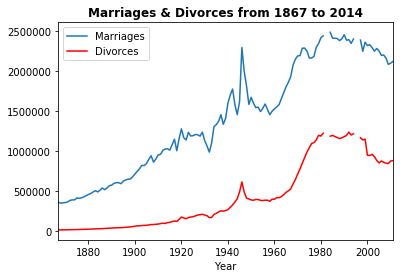

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

marriage = pd.read_csv("us-marriages-divorces-1867-2014.csv")

lineplot = plt.gca()

marriage.plot(kind='line',x='Year',y='Marriages', ax=lineplot)
marriage.plot(kind='line',x='Year',y='Divorces', color='red', ax=lineplot)
lineplot.set_title('Marriages & Divorces from 1867 to 2014',weight='bold')
plt.show()

## Question 7

#### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

In [115]:
marriage_filtered = marriage[marriage['Year'].isin(['1900','1950','2000'])]
marriage_filtered

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


Text(0.5, 1.0, 'Marriages & Divorces in 1900, 1950 & 2000')

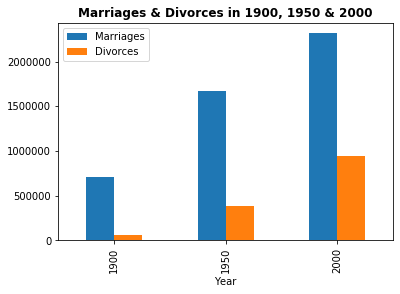

In [116]:
bargraph = marriage_filtered.plot(x="Year", y=["Marriages", "Divorces"], kind="bar")
bargraph.set_title('Marriages & Divorces in 1900, 1950 & 2000',weight='bold')

## Question 8

#### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. 

Text(0, 0.5, 'Count')

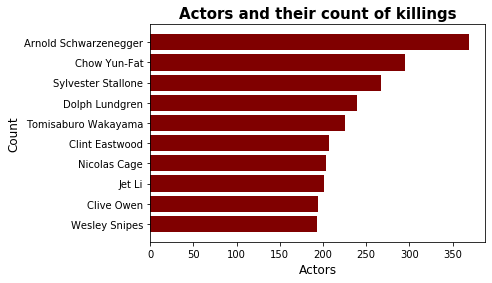

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

actors = pd.read_csv("actor_kill_counts.csv")
#Sorting the data by count
actors = actors.sort_values('Count')

fig, ax = plt.subplots()
ax.barh(actors["Actor"], actors["Count"], align='center',color='maroon')
ax.set_title('Actors and their count of killings',weight='bold',fontsize=15)
ax.set_xlabel('Actors',fontsize=12)
ax.set_ylabel('Count',fontsize=12)

## Question 9

#### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

romans = pd.read_csv("roman-emperor-reigns.csv")

#Creating a dataframe with counts of each cause of death
death_count = romans.groupby('Cause_of_Death')['Emperor'].count()
death_count.to_frame()

,Emperor
Cause_of_Death,
Assassinated,22
Died in captivity,1
Executed,3
Illness,5
Killed in battle,8
Natural causes,16
Possibly assassinated,8
Suicide,5


Text(0, 0.5, '')

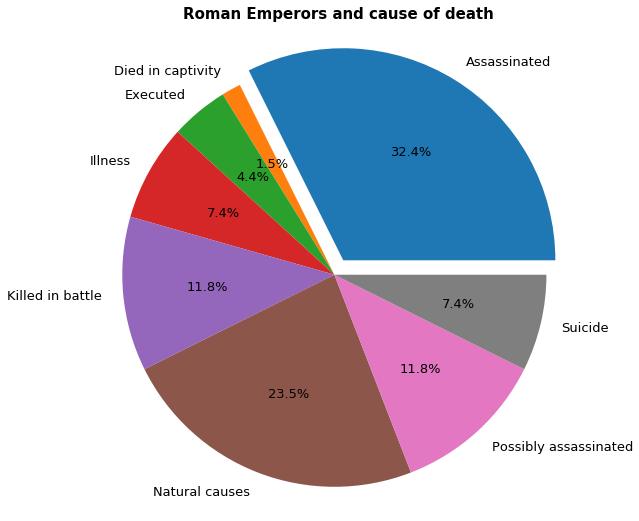

In [10]:
plot = death_count.plot.pie(y='Cause_of_Death', figsize=(9, 9), autopct='%1.1f%%',
                            explode = (0.08,0,0,0,0,0,0,0), textprops={'fontsize': 13})
plt.axis('equal')
plt.title('Roman Emperors and cause of death', fontsize=15, weight='bold')
plt.ylabel('')

## Question 10

#### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Text(0, 0.5, 'Total Arcade Revenue (billions)')

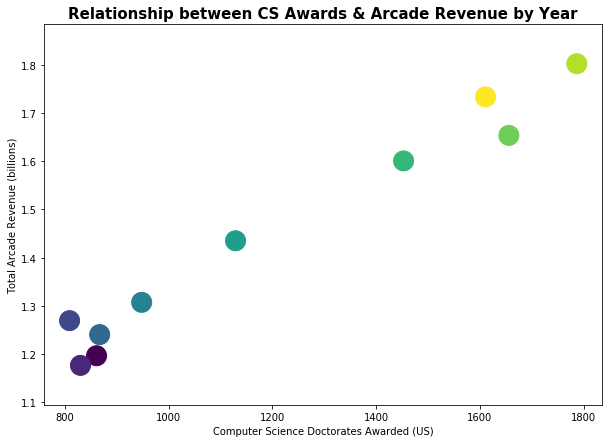

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

arcade = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

plt.scatter(arcade['Computer Science Doctorates Awarded (US)'], 
            arcade['Total Arcade Revenue (billions)'],
            s=400,
            c=(0,1,2,3,4,5,6,7,8,9),
            )

plt.gcf().set_size_inches(10, 7)
plt.title('Relationship between CS Awards & Arcade Revenue by Year', weight='bold', fontsize=15)
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')